## Daniel Barella
## 9/27/25

## 📘 Day 25 – Decision Trees & Random Forests
## 🌱 Core Concepts

- Decision Trees for classification

- Splitting criteria (Gini impurity, entropy)

- Overfitting in trees

- Random Forests for ensemble learning

- Feature importance

## 🧪 Practice Code

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



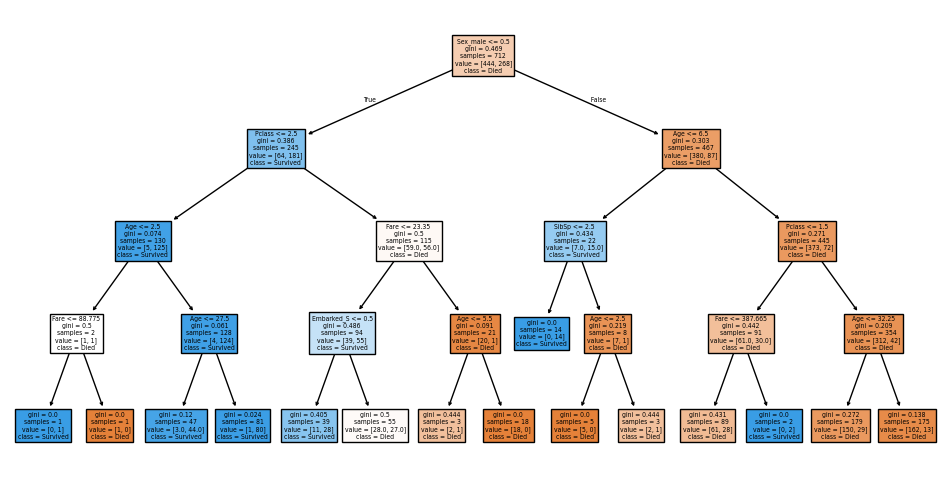

Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



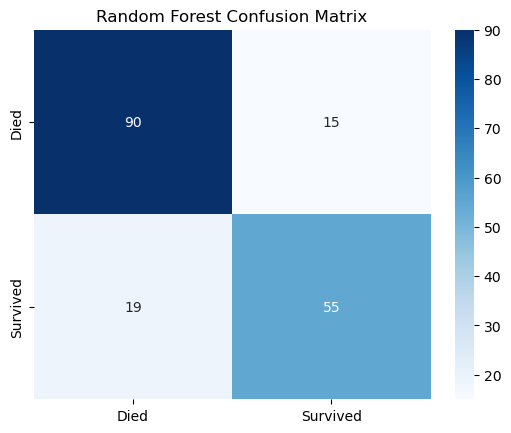

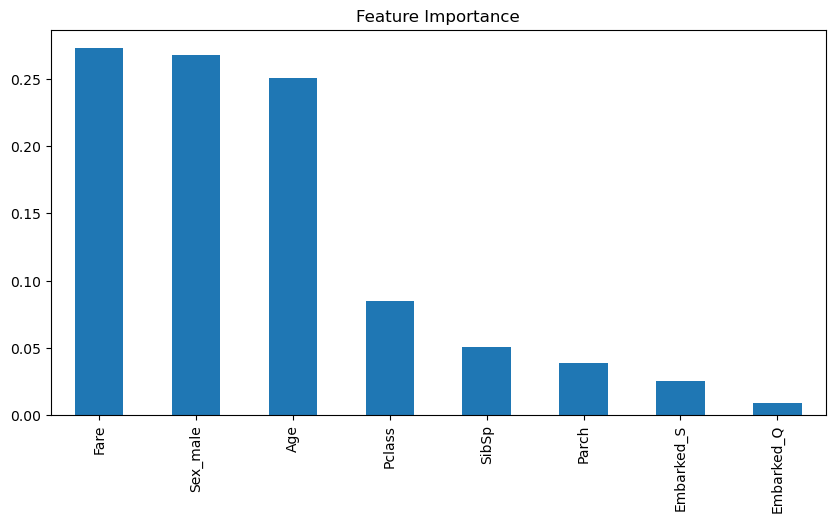

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select features and target
X = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
X = pd.get_dummies(X, drop_first=True)
y = df["Survived"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Decision Tree ----
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

y_pred_tree = dtree.predict(X_test)
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))

plt.figure(figsize=(12,6))
plot_tree(dtree, feature_names=X.columns, class_names=["Died","Survived"], filled=True)
plt.show()

# ---- Random Forest ----
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

y_pred_rf = rforest.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died","Survived"], yticklabels=["Died","Survived"])
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature importance
feat_importance = pd.Series(rforest.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importance.plot(kind="bar", figsize=(10,5), title="Feature Importance")
plt.show()


## 🎯 Mini Project – Titanic Survival Prediction with Random Forest

- Train a Decision Tree and a Random Forest on the Titanic dataset.

- Compare their accuracy and confusion matrices.

- Visualize feature importances from the Random Forest.

- Reflection: Did the ensemble (RF) outperform the single tree? Which features were most important?

The Random Forest performed slightly better overall than the single Decision Tree, with higher balanced precision and recall, leading to a small accuracy boost. This shows the ensemble helped reduce overfitting. The most important features driving survival were Sex, Pclass, Age, and Fare, which consistently carry the strongest predictive power in this dataset.